## Feature Scaling

Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. 

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
import warnings

In [11]:
warnings.filterwarnings("ignore")

### 1. Standardization, or mean removal and variance scaling

Standardization is the process where the features are rescaled so that they’ll have the properties of a `standard normal distribution with μ=0(mean = 0) and σ=1(standard deviation=1)`.
Standard scores (also called z scores) of the samples are calculated as follows : 
  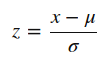

Transforming the data to center it by removing the mean value of each feature, then scale it by dividing by their standard deviation.

**Note:**
    `kNN with euclidean distance measure, k-means, SVM, perceptron, neural networks, linear discriminant analysis, principal component analysis may perform better with standardized data`.

**`Syntax : preprocessing.scale(X)`**

#### One - Dimensional Array

In [12]:
x = np.array([200,100,320,150,210,400])

In [13]:
from sklearn import preprocessing

In [7]:
Z_scale = preprocessing.scale(x)

In [8]:
Z_scale

array([-0.29607826, -1.28300581,  0.88823479, -0.78954203, -0.19738551,
        1.67777682])

In [10]:
print("Mean :",Z_scale.mean())
print("Std : ",Z_scale.std())

Mean : -3.700743415417188e-17
Std :  1.0


In [10]:
(x[0] - x.mean()) / x.std()

-0.2960782627318961

#### Two - Dimensional Data

In [11]:
x_2 = np.array([[2,3,4],[1,4,6]])

In [17]:
x_2

array([[2, 3, 4],
       [1, 4, 6]])

In [12]:
Z_scale = preprocessing.scale(x_2)
Z_scale

array([[ 1., -1., -1.],
       [-1.,  1.,  1.]])

In [13]:
## Mean
x_2.mean(axis=0) # Column wise mean value

array([1.5, 3.5, 5. ])

In [14]:
## Std
x_2.std(axis=0) # Column wise standard Deviation

array([0.5, 0.5, 1. ])

In [18]:
## First value is 1

(2 - 1.5)/0.5


1.0

#### Data Frame

In [14]:
data = pd.read_csv("Data.csv")
data.head(2)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes


In [5]:
X = data.iloc[:,[1,2]]
X

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


The preprocessing module provides a utility class `StandardScaler` that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.

In [7]:
from sklearn import preprocessing
Stand_scaler = preprocessing.StandardScaler()

In [8]:
Stand_scaler.fit_transform(X)

array([[ 0.71993143,  0.71101276],
       [-1.62367514, -1.36437583],
       [-1.21009751, -0.84552869],
       [-0.10722383, -0.24020701],
       [ 0.16849459,         nan],
       [-0.52080146, -0.49963059],
       [        nan, -1.01847774],
       [ 1.27136827,  1.31633443],
       [ 1.54708669,  1.66223253],
       [-0.24508304,  0.27864014]])

### 2. Scaling features to a range

### MinMaxScaler(Normalization)


`MinMaxScaler(feature_range=(0, 1), copy=True)`

Transforms features by scaling each feature to a given range.
This estimator scales and translates each feature individually such that it is in the given range on the training set.
e.g. between zero and one.

**Note :**
- The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries.in data.
- neural networks often expect an input value ranging from 0 to 1.
- It is effected by outliers.

#### Two - Dimensional Array

In [24]:
x = np.array([[9,1],[5,7],[3,4]])
x

array([[9, 1],
       [5, 7],
       [3, 4]])

In [25]:
from sklearn import preprocessing

In [26]:
# Initialize the class
Min_Max_scale = preprocessing.MinMaxScaler()

In [27]:
# Fit and Transform 
Min_Max_scale.fit_transform(x)

array([[1.        , 0.        ],
       [0.33333333, 1.        ],
       [0.        , 0.5       ]])

In [28]:
Min = x.min(axis=0) # column wise mean
Min

array([3, 1])

In [29]:
Max = x.max(axis=0)
Max

array([9, 7])

In [30]:
# Formula for MinMaxScaler
(x - Min) / (Max - Min)

array([[-1.        , -0.        ],
       [-0.33333333, -1.        ],
       [-0.        , -0.5       ]])

#### Data Frame

In [54]:
data.head(2)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes


In [56]:
X = data.iloc[:,[1,2]]

In [55]:
# Initialze the object
Min_Max_scale = preprocessing.MinMaxScaler()

In [57]:
# Fit and Transform Age and Salary columns
Min_Max_scale.fit_transform(X)

array([[0.73913043, 0.68571429],
       [0.        , 0.        ],
       [0.13043478, 0.17142857],
       [0.47826087, 0.37142857],
       [0.56521739,        nan],
       [0.34782609, 0.28571429],
       [       nan, 0.11428571],
       [0.91304348, 0.88571429],
       [1.        , 1.        ],
       [0.43478261, 0.54285714]])

### MaxAbsScaler

- Scale each feature by its `maximum absolute value`.
- This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. 
- It does not shift/center the data, and thus does not destroy any sparsity.

Scale each feature to the [-1, 1] range without breaking the sparsity.

#### Two Dimensional Array

In [31]:
x = np.array([[-500.5],
              [-100.1],
             [0],
             [100.1],
             [900.9]])

In [32]:
x

array([[-500.5],
       [-100.1],
       [   0. ],
       [ 100.1],
       [ 900.9]])

In [33]:
max(abs(x)) # Maximum absolute value

array([900.9])

In [34]:
x/max(abs(x))

array([[-0.55555556],
       [-0.11111111],
       [ 0.        ],
       [ 0.11111111],
       [ 1.        ]])

In [35]:
from sklearn import preprocessing

In [36]:
# Initialize the object
Max_Abs_scale = preprocessing.MaxAbsScaler()

In [37]:
# Fit and Transform
Max_Abs_scale.fit_transform(x)

array([[-0.55555556],
       [-0.11111111],
       [ 0.        ],
       [ 0.11111111],
       [ 1.        ]])

#### Data Frame

In [40]:
data.head(2)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes


In [67]:
X = data.iloc[:,[1,2]]

In [68]:
# Fit and Transform Age and Salary Columns
Max_Abs_scale.fit_transform(X)

array([[0.88      , 0.86746988],
       [0.54      , 0.57831325],
       [0.6       , 0.65060241],
       [0.76      , 0.73493976],
       [0.8       ,        nan],
       [0.7       , 0.69879518],
       [       nan, 0.62650602],
       [0.96      , 0.95180723],
       [1.        , 1.        ],
       [0.74      , 0.80722892]])

### 3. Normalizer

The terms normalization and standardization are sometimes used interchangeably, but they usually refer to different things. Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to have a mean of zero and a standard deviation of 1.

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra). 
This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using
algorithms that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors.

**`sklearn.preprocessing.normalize(X, norm=’l2’, axis=1, copy=True, return_norm=False)`**

#### Two - Dimensional Array

In [70]:
x = np.array([[2,3],[4,1],[5,2]])
x

array([[2, 3],
       [4, 1],
       [5, 2]])

In [ ]:
from sklearn import preprocessing

In [71]:
# Initialize the object
normalize = preprocessing.Normalizer()

In [72]:
# Fit and Transform
normalize.fit_transform(x)

array([[0.5547002 , 0.83205029],
       [0.9701425 , 0.24253563],
       [0.92847669, 0.37139068]])

**Normalizer = Xi / Square root (sum of square of that row)**

In [77]:
2/np.sqrt(4+9)

0.5547001962252291

#### Data Frame

In [84]:
data = data.dropna() # Dropping Missing values
data # After droping missing values

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [85]:
X = data.iloc[:,[1,2]]

In [86]:
# Initialize the object
normalize = preprocessing.Normalizer()

In [87]:
# Fit and Transform the Age and Salary
normalize.fit_transform(X)

array([[6.11110997e-04, 9.99999813e-01],
       [5.62499911e-04, 9.99999842e-01],
       [5.55555470e-04, 9.99999846e-01],
       [6.22950699e-04, 9.99999806e-01],
       [6.03448166e-04, 9.99999818e-01],
       [6.07594825e-04, 9.99999815e-01],
       [6.02409529e-04, 9.99999819e-01],
       [5.52238722e-04, 9.99999848e-01]])

### 4. Robust Scaler 

Scale features using statistics that are robust to outliers.

This Scaler removes the `median` and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)

**RobustScaler = $ (xi - Median)/IQR $**

In [20]:
# Selecting only Age and Salary Columns
num = data[['Age','Salary']]
num

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [21]:
# calculating median values for Age,Salary columns
median = num.median()
median

Age          38.0
Salary    61000.0
dtype: float64

In [23]:
# calculating 1st Quarter values fro Age,Salary columns
Q1 = num.quantile(0.25)
Q1

Age          35.0
Salary    54000.0
Name: 0.25, dtype: float64

In [24]:
# calculating 3rd Quarter values for Age,Salary columns
Q3 = num.quantile(0.75)
Q3

Age          44.0
Salary    72000.0
Name: 0.75, dtype: float64

In [39]:
print(type(median))

print("Median Age: ",median[0])
print("Median Salary",median[1])

<class 'pandas.core.series.Series'>
Median Age:  38.0
Median Salary 61000.0


In [37]:
# Scaling Age column
IQR = Q3[0]-Q1[0]
(data['Age'] - median[0])/IQR

0    0.666667
1   -1.222222
2   -0.888889
3    0.000000
4    0.222222
5   -0.333333
6         NaN
7    1.111111
8    1.333333
9   -0.111111
Name: Age, dtype: float64

In [40]:
# Scaling Salary Column
IQR = Q3[1] - Q1[1]
(data['Salary'] - median[1]) / IQR

0    0.611111
1   -0.722222
2   -0.388889
3    0.000000
4         NaN
5   -0.166667
6   -0.500000
7    1.000000
8    1.222222
9    0.333333
Name: Salary, dtype: float64

In [41]:
# using Sklearn
from sklearn.preprocessing import RobustScaler
R_scaler = RobustScaler()
R_scaler.fit_transform(data[['Age','Salary']])

array([[ 0.66666667,  0.61111111],
       [-1.22222222, -0.72222222],
       [-0.88888889, -0.38888889],
       [ 0.        ,  0.        ],
       [ 0.22222222,         nan],
       [-0.33333333, -0.16666667],
       [        nan, -0.5       ],
       [ 1.11111111,  1.        ],
       [ 1.33333333,  1.22222222],
       [-0.11111111,  0.33333333]])